## Argo status with AWS

In this example we use a new feature!, the Argo data is uploaded to [Amazon Web Services, AWS](https://registry.opendata.aws/argo-gdac-marinedata/) and here we use this advantage to access the Argo data in the cloud!

Let's use, reproduce the figure of the status of the Argo network that is found on the AST web page:

In [2]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

from datetime import date, timedelta

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

import s3fs 

Let's use today's date:

In [3]:
day=18
month=9
year=2025

In [4]:
status_date = date(year,month,day)

In [5]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
TEMPs=np.array([])
PROJECT_NAMEs=np.array([])

In [25]:
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for i in  range(0,15):
        day = status_date - timedelta(days=i)
        print("%s, " % day,end="") 
        
        fs = s3fs.S3FileSystem(anon=True)
        filein=f"s3://argo-gdac-sandbox/pub/geo/{basin}/{day.year:04d}/{day.month:02d}/{day.year:04d}{day.month:02d}{day.day:02d}_prof.nc"
        with fs.open(filein) as fileObj:
            DS = xr.open_dataset(fileObj)
    

        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        PROJECT_NAMEs=np.append(PROJECT_NAMEs,DS.PROJECT_NAME.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)
        LONs=np.append(LONs,DS.LONGITUDE.values)
        LATs=np.append(LATs,DS.LATITUDE.values)
        
        tempi= np.zeros(DS.LONGITUDE.values.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,DS.LONGITUDE.values.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
        TEMPs=np.append(TEMPs,tempi)

2025-09-18, 2025-09-17, 2025-09-16, 2025-09-15, 2025-09-14, 2025-09-13, 2025-09-12, 2025-09-11, 2025-09-10, 2025-09-09, 2025-09-08, 2025-09-07, 2025-09-06, 2025-09-05, 2025-09-04, 2025-09-18, 2025-09-17, 2025-09-16, 2025-09-15, 2025-09-14, 2025-09-13, 2025-09-12, 2025-09-11, 2025-09-10, 2025-09-09, 2025-09-08, 2025-09-07, 2025-09-06, 2025-09-05, 2025-09-04, 2025-09-18, 2025-09-17, 2025-09-16, 2025-09-15, 2025-09-14, 2025-09-13, 2025-09-12, 2025-09-11, 2025-09-10, 2025-09-09, 2025-09-08, 2025-09-07, 2025-09-06, 2025-09-05, 2025-09-04, 

In [26]:
#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]
PROJECT_NAMEs=PROJECT_NAMEs[indices]
TEMPs=TEMPs[indices]

In [27]:
DACs=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')


In [32]:
print(f"{WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],200):
    print(f"{ip:04d} WMO {WMOs[ip]:07.0f} DAC {DACs[ip]}, ...")

3748 Argo floats where active:
0000 WMO 1901514 DAC aoml, ...
0200 WMO 1902374 DAC aoml, ...
0400 WMO 1902726 DAC aoml, ...
0600 WMO 2903729 DAC jma, ...
0800 WMO 3901789 DAC aoml, ...
1000 WMO 3902374 DAC aoml, ...
1200 WMO 4902542 DAC meds, ...
1400 WMO 4903209 DAC aoml, ...
1600 WMO 4903575 DAC aoml, ...
1800 WMO 5904773 DAC aoml, ...
2000 WMO 5905481 DAC csiro, ...
2200 WMO 5905778 DAC aoml, ...
2400 WMO 5906289 DAC aoml, ...
2600 WMO 5906609 DAC jma, ...
2800 WMO 5906917 DAC aoml, ...
3000 WMO 6902862 DAC coriolis, ...
3200 WMO 6904104 DAC coriolis, ...
3400 WMO 7900542 DAC coriolis, ...
3600 WMO 7902051 DAC aoml, ...


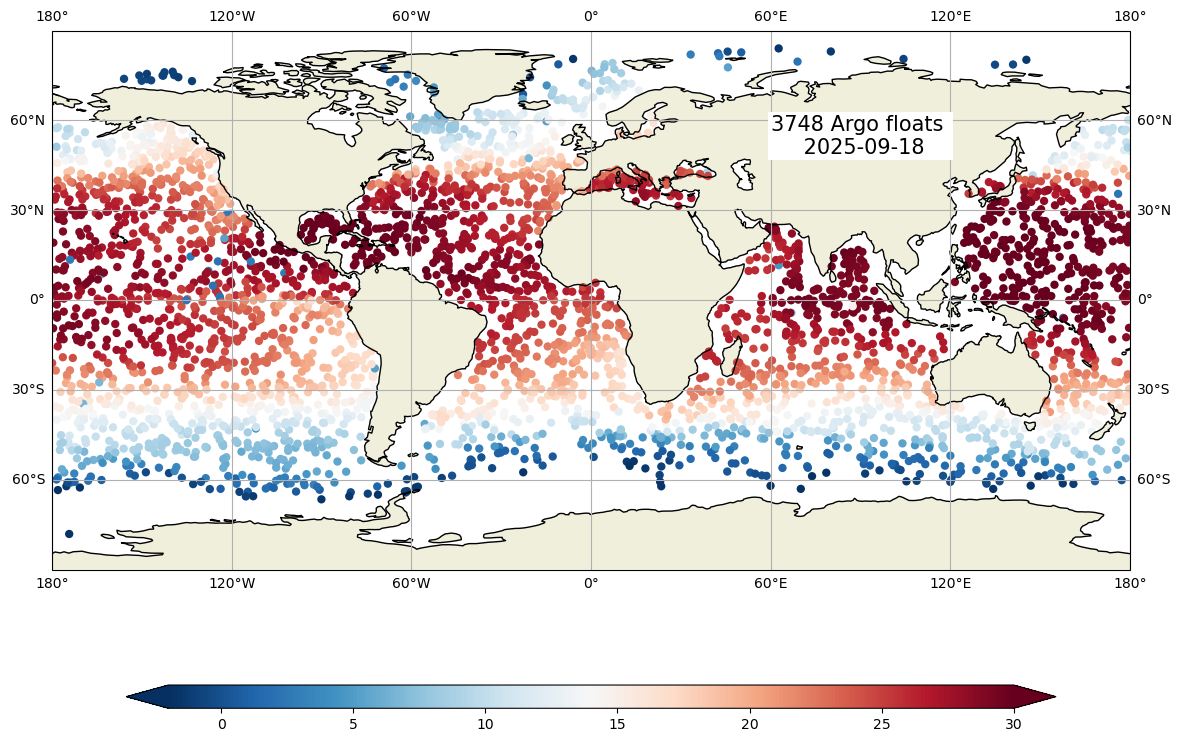

In [33]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global()
cs=ax.scatter(LONs,LATs,c=TEMPs,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')
ax.text(90,62,f"{WMOs.shape[0]} Argo floats \n {status_date:%Y-%m-%d}",fontsize=15, horizontalalignment='center',
        verticalalignment='top',bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.add_feature(cartopy.feature.COASTLINE.with_scale('110m'), edgecolor='black')

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)